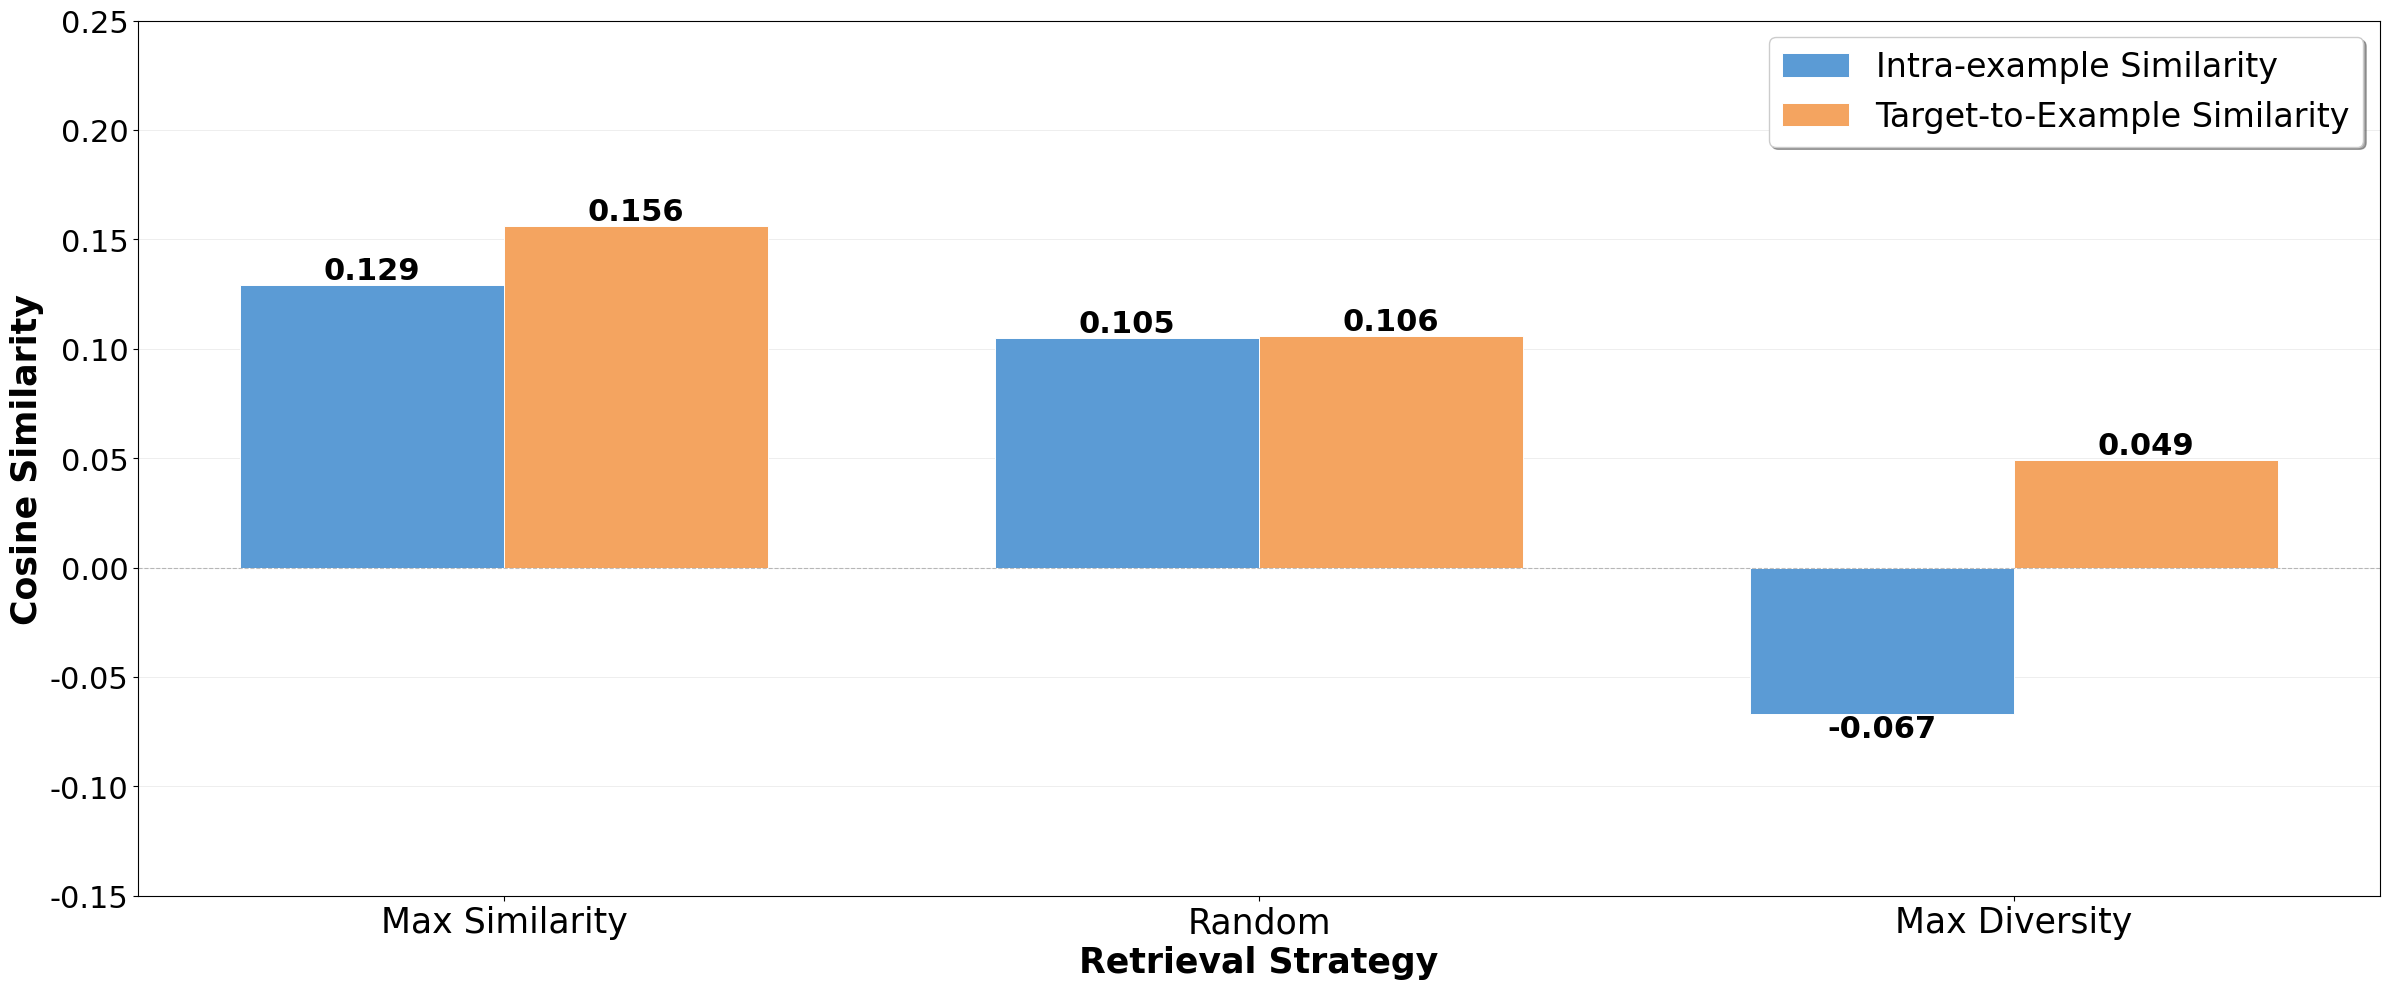

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False


strategies = ['Max Similarity', 'Random', 'Max Diversity']
intra_example = [0.129, 0.105, -0.067]
target_to_example = [0.156, 0.106, 0.049]


x = np.arange(len(strategies))
width = 0.35


fig, ax = plt.subplots(figsize=(24, 10))


bars1 = ax.bar(x - width/2, intra_example, width, label='Intra-example Similarity', 
               color='#5B9BD5', edgecolor='white', linewidth=0.7)
bars2 = ax.bar(x + width/2, target_to_example, width, label='Target-to-Example Similarity', 
               color='#F4A460', edgecolor='white', linewidth=0.7)

# 在条形图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom' if height >= 0 else 'top',
                fontsize=22, fontweight='bold')


ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)


ax.set_xlabel('Retrieval Strategy', fontsize=25, fontweight='bold')
ax.set_ylabel('Cosine Similarity', fontsize=25, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(strategies, fontsize=25)
ax.tick_params(axis='y', labelsize=22)



ax.set_ylim(-0.15, 0.25)


ax.legend(fontsize=24, frameon=True, shadow=True, loc='upper right')


ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)


plt.tight_layout()


plt.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

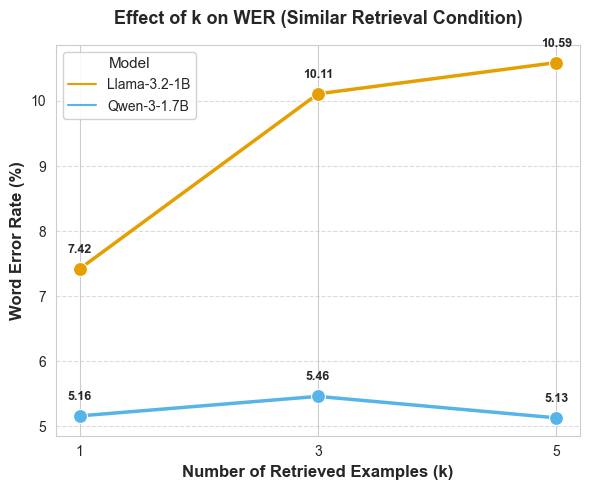

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data for k comparison (only Similar condition for Llama and Qwen)
data = {
    'Model': ['Llama-3.2-1B', 'Llama-3.2-1B', 'Llama-3.2-1B',
              'Qwen-3-1.7B', 'Qwen-3-1.7B', 'Qwen-3-1.7B'],
    'k': [1, 3, 5, 1, 3, 5],
    'WER': [7.42, 10.11, 10.59, 5.16, 5.46, 5.13]
}

df = pd.DataFrame(data)

# Set style
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(6, 5))

# Create line plot with markers
sns.lineplot(data=df, x='k', y='WER', hue='Model', 
             marker='o', markersize=10, linewidth=2.5, 
             palette=['#E69F00', '#56B4E9'], ax=ax)

# Add value labels on points
for model in df['Model'].unique():
    model_data = df[df['Model'] == model]
    for idx, row in model_data.iterrows():
        ax.text(row['k'], row['WER'] + 0.2, f"{row['WER']:.2f}", 
                ha='center', va='bottom', fontsize=9, fontweight='bold')

# Customize plot
ax.set_xlabel('Number of Retrieved Examples (k)', fontsize=12, fontweight='bold')
ax.set_ylabel('Word Error Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('Effect of k on WER (Similar Retrieval Condition)', 
             fontsize=13, fontweight='bold', pad=15)

# Set x-axis ticks
ax.set_xticks([1, 3, 5])
ax.set_xticklabels(['1', '3', '5'])

# Customize legend
ax.legend(title='Model', title_fontsize=11, fontsize=10, 
          loc='upper left', framealpha=0.9)

# Grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


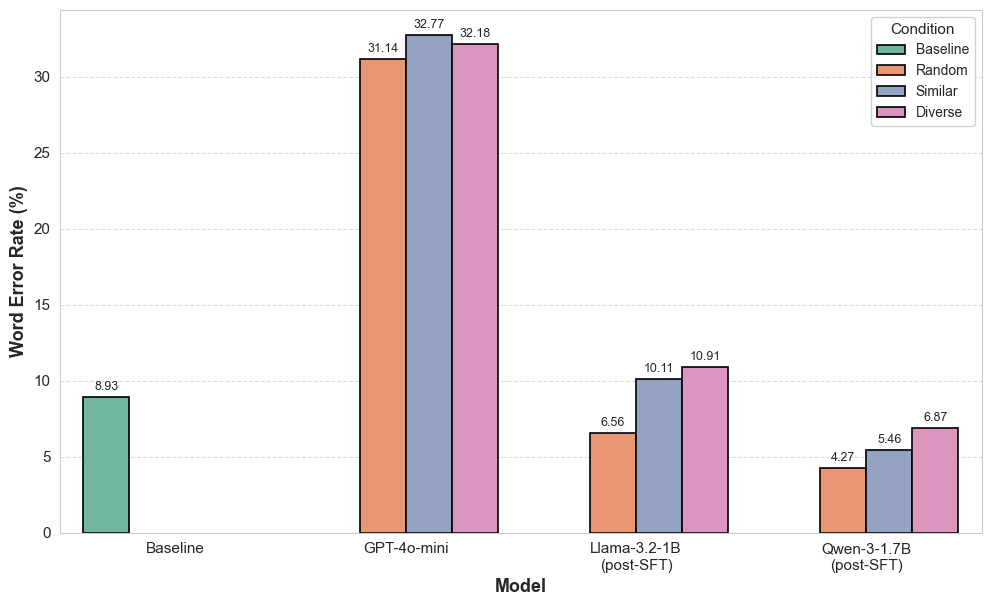

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare data (k=3 only, excluding k=1 and k=5 cases)
data = {
    'Model': ['Baseline', 
              'GPT-4o-mini', 'GPT-4o-mini', 'GPT-4o-mini', 
              'Llama-3.2-1B', 'Llama-3.2-1B', 'Llama-3.2-1B',
              'Qwen-3-1.7B', 'Qwen-3-1.7B', 'Qwen-3-1.7B'],
    'Condition': ['Baseline', 
                  'Random', 'Similar', 'Diverse', 
                  'Random', 'Similar', 'Diverse',
                  'Random', 'Similar', 'Diverse'],
    'WER': [8.93, 
            31.14, 32.77, 32.18, 
            6.56, 10.11, 10.91,
            4.27, 5.46, 6.87]
}

df = pd.DataFrame(data)

# Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Create grouped bar plot
ax = sns.barplot(data=df, x='Model', y='WER', hue='Condition', 
                 palette='Set2', edgecolor='black', linewidth=1.2)

# Customize plot
plt.ylabel('Word Error Rate (%)', fontsize=13, fontweight='bold')
plt.xlabel('Model', fontsize=13, fontweight='bold')

# Adjust legend
plt.legend(title='Condition', title_fontsize=11, fontsize=10, 
           loc='upper right', framealpha=0.9)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=9)

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=0, fontsize=11)

# Modify x-axis labels to add (post-SFT) annotation
labels = [item.get_text() for item in ax.get_xticklabels()]
new_labels = []
for label in labels:
    if 'Llama' in label or 'Qwen' in label:
        new_labels.append(f'{label}\n(post-SFT)')
    else:
        new_labels.append(label)
ax.set_xticklabels(new_labels, fontsize=11)

plt.yticks(fontsize=11)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
plt.show()

